In [13]:
feature, feature_name= audioFeatureExtraction.stFeatureExtraction(x, Fs, 0.050*Fs, 0.025*Fs)#stFeautureExtraction提取了长时间的特征，返回一个元组

In [14]:
feature.shape

(34, 70)

In [18]:
feature_name

['zcr',
 'energy',
 'energy_entropy',
 'spectral_centroid',
 'spectral_spread',
 'spectral_entropy',
 'spectral_flux',
 'spectral_rolloff',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'chroma_1',
 'chroma_2',
 'chroma_3',
 'chroma_4',
 'chroma_5',
 'chroma_6',
 'chroma_7',
 'chroma_8',
 'chroma_9',
 'chroma_10',
 'chroma_11',
 'chroma_12',
 'chroma_std']

Text(0, 0.5, 'Energy')

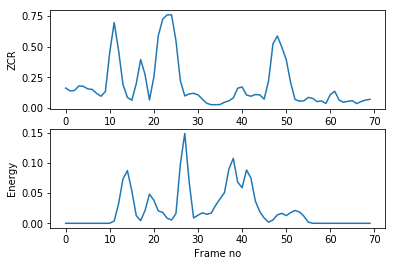

In [19]:
plt.subplot(2,1,1)
plt.plot(feature[0,:])
plt.xlabel("Frame no")
plt.ylabel("ZCR")
plt.subplot(2,1,2)
plt.plot(feature[1,:])
plt.xlabel("Frame no")
plt.ylabel("Energy")

In [4]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import audioFeatureExtraction
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# EMO-DB数据集

In [14]:
emotions= {
    'W':'anger',
    'L':'boredom',
    'E':'disgust',
    'A':'fear',
    'F':'happiness',
    'T':'sadness',
    'N':'neutral'
}
def extract_feature(file_name):
    sample_rate, X= audioBasicIO.readAudioFile(file_name)
    feature, feature_name= audioFeatureExtraction.stFeatureExtraction(X, sample_rate, 0.050*sample_rate, 0.025*sample_rate)
    temp= []
    temp=np.hstack((temp, np.concatenate((np.mean(feature,axis=1),np.std(feature, axis=1)),axis=0)))
    return temp
#导入数据，返回提取出的特征数组以及标签
def load_emoDB(Normalization=False, Standardization=False):
    x, y=[],[]
    for file in glob.glob('C:\\Users\\Administrator\\Desktop\\EMO-DB\\wav\\*.wav'):
        file_name= os.path.basename(file)
        emotion= emotions[file_name.split('.')[0][-2]]
        feature= extract_feature(file)
        x.append(feature)
        y.append(emotion)
    x= np.array(x)
    if Normalization:
        return MinMaxScaler().fit_transform(x),y
    elif Standardization:
        return StandardScaler().fit_transform(x),y
    else:
        return x,y

In [18]:
data,label= load_emoDB(Standardization=True)

In [19]:
data.shape

(535, 68)

In [21]:
x_train, x_test, y_train, y_test= train_test_split(data, label, random_state=0, test_size=0.25)

## 支持向量机

In [20]:
grid = GridSearchCV(SVC(random_state=9,kernel='rbf'), param_grid={"C":[0.1, 1, 10], "gamma": [1, 0.1, 0.01]}, cv=10)
grid.fit(data, label)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10, 'gamma': 0.01} with a score of 0.70


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
model= SVC(kernel='rbf',random_state=9,C=10, gamma=0.01)
print(cross_val_score(model, data, label, cv=10,scoring='balanced_accuracy').mean())

0.6901443397871969


In [23]:
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

       anger       0.69      0.86      0.77        29
     boredom       0.78      0.82      0.80        22
     disgust       0.75      0.60      0.67        10
        fear       0.87      0.72      0.79        18
   happiness       0.65      0.61      0.63        18
     neutral       0.79      0.83      0.81        18
     sadness       0.94      0.79      0.86        19

    accuracy                           0.77       134
   macro avg       0.78      0.75      0.76       134
weighted avg       0.78      0.77      0.77       134



## 随机森林分类

In [43]:
grid = GridSearchCV(RandomForestClassifier(random_state=9), param_grid={'n_estimators':[120,130,140,150,160,170,180]}, cv=10)
grid.fit(data, label)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best parameters are {'n_estimators': 150} with a score of 0.63


In [45]:
model= RandomForestClassifier(n_estimators=150,random_state=9)
print(cross_val_score(model, data, label, cv=10,scoring='balanced_accuracy').mean())

0.6005468341182627


In [46]:
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

       anger       0.71      0.93      0.81        29
     boredom       0.83      0.68      0.75        22
     disgust       0.50      0.30      0.37        10
        fear       0.69      0.50      0.58        18
   happiness       0.61      0.61      0.61        18
     neutral       0.61      0.78      0.68        18
     sadness       0.89      0.84      0.86        19

    accuracy                           0.71       134
   macro avg       0.69      0.66      0.67       134
weighted avg       0.71      0.71      0.70       134



## Xgboost

In [50]:
grid = GridSearchCV(XGBClassifier(random_state=9,learning_rate=0.1), param_grid={'n_estimators':[100,200,300]}, cv=10)
grid.fit(data, label)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best parameters are {'n_estimators': 100} with a score of 0.64


In [52]:
model= XGBClassifier(n_estimators=100,random_state=9,n_jobs=-1)
print(cross_val_score(model, data, label, cv=10,scoring='balanced_accuracy').mean())

0.6104936333507762


In [53]:
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

       anger       0.69      0.83      0.75        29
     boredom       0.79      0.68      0.73        22
     disgust       0.57      0.40      0.47        10
        fear       0.83      0.56      0.67        18
   happiness       0.53      0.56      0.54        18
     neutral       0.65      0.83      0.73        18
     sadness       0.74      0.74      0.74        19

    accuracy                           0.69       134
   macro avg       0.69      0.66      0.66       134
weighted avg       0.70      0.69      0.68       134



## K近邻分类

In [54]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,20)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,20)],
        'p':[i for i in range(1,6)]
    }
]
grid = GridSearchCV(KNeighborsClassifier(),param_grid, n_jobs=-1,cv=10)
grid.fit(data, label)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'n_neighbors': 10, 'p': 2, 'weights': 'distance'} with a score of 0.65


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [55]:
model=KNeighborsClassifier(n_neighbors=10,weights='distance',p=2)
print(cross_val_score(model, data, label, cv=10,scoring='balanced_accuracy').mean())

0.6119645037502179


In [56]:
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

       anger       0.59      0.93      0.72        29
     boredom       0.91      0.45      0.61        22
     disgust       0.83      0.50      0.62        10
        fear       0.89      0.44      0.59        18
   happiness       0.82      0.50      0.62        18
     neutral       0.50      0.89      0.64        18
     sadness       0.84      0.84      0.84        19

    accuracy                           0.68       134
   macro avg       0.77      0.65      0.66       134
weighted avg       0.75      0.68      0.67       134



## 逻辑回归分类

In [82]:
grid = GridSearchCV(LogisticRegression(solver='saga',random_state=9,n_jobs=-1,multi_class='auto'),param_grid={'C':[0.5,0.6,0.7,0.8,0.9,1]},n_jobs=-1,cv=10)
grid.fit(data, label)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best parameters are {'C': 0.6} with a score of 0.74


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [83]:
model=LogisticRegression(multi_class='auto',solver='saga',random_state=9,n_jobs=-1,C=0.6)
print(cross_val_score(model, data, label, cv=10,scoring='balanced_accuracy').mean())

0.7310984650270365


In [84]:
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

       anger       0.73      0.83      0.77        29
     boredom       0.78      0.82      0.80        22
     disgust       0.88      0.70      0.78        10
        fear       0.88      0.83      0.86        18
   happiness       0.63      0.67      0.65        18
     neutral       0.79      0.83      0.81        18
     sadness       0.93      0.74      0.82        19

    accuracy                           0.78       134
   macro avg       0.80      0.77      0.78       134
weighted avg       0.79      0.78      0.78       134



C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## 线性判别分析分类

In [70]:
grid = GridSearchCV(LinearDiscriminantAnalysis(),param_grid={'n_components':[1,2,3,4,5,6]},n_jobs=-1,cv=10)
grid.fit(data, label)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'n_components': 1} with a score of 0.71


In [71]:
model=LinearDiscriminantAnalysis(n_components=1)
print(cross_val_score(model, data, label, cv=10,scoring='balanced_accuracy').mean())

0.70136926565498


In [72]:
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

       anger       0.79      0.79      0.79        29
     boredom       0.75      0.82      0.78        22
     disgust       0.80      0.80      0.80        10
        fear       0.88      0.78      0.82        18
   happiness       0.65      0.72      0.68        18
     neutral       0.74      0.78      0.76        18
     sadness       0.94      0.79      0.86        19

    accuracy                           0.78       134
   macro avg       0.79      0.78      0.79       134
weighted avg       0.79      0.78      0.79       134



# EMO-DB训练的系统在RAVDESS的识别效果

In [1]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import audioFeatureExtraction
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
#特征提取函数[68,n]
def extract_feature(file_name):
    sample_rate, X= audioBasicIO.readAudioFile(file_name)
    feature, feature_name= audioFeatureExtraction.stFeatureExtraction(X, sample_rate, 0.050*sample_rate, 0.025*sample_rate)
    temp= []
    temp=np.hstack((temp, np.concatenate((np.mean(feature,axis=1),np.std(feature, axis=1)),axis=0)))
    return temp

In [3]:
emotions= {
    'W':'anger',
    'L':'boredom',
    'E':'disgust',
    'A':'fear',
    'F':'happiness',
    'T':'sadness',
    'N':'neutral'
}
#导入数据，返回提取出的特征数组以及标签
def load_emoDB(Normalization=False, Standardization=True):
    x, y=[],[]
    for file in glob.glob('C:\\Users\\Administrator\\Desktop\\EMO-DB\\wav\\*.wav'):
        file_name= os.path.basename(file)
        emotion= emotions[file_name.split('.')[0][-2]]
        feature= extract_feature(file)
        x.append(feature)
        y.append(emotion)
    x= np.array(x)
    if Normalization:
        return MinMaxScaler().fit_transform(x),y
    elif Standardization:
        return StandardScaler().fit_transform(x),y
    else:
        return x,y
emo_data, emo_label= load_emoDB()

In [4]:
RAV_emotions= {
    '01':'neutral',
    '02':'calm',
    '03':'happiness',
    '04':'sadness',
    '05':'anger',
    '06':'fear',
    '07':'disgust',
    '08':'surprised'
}
observed_emotions= ['anger','disgust','fear','happiness','sadness','neutral']

In [6]:
temp=glob.glob('C:\\Users\\Administrator\\Desktop\\RAVDESS\\Actor_*\\*.wav')

In [18]:
temp= extract_feature(r'C:\Users\Administrator\Desktop\RAVDESS\Actor_20\03-01-03-01-02-01-20.wav')

ValueError: cannot reshape array of size 4800 into shape (240,10)

In [17]:

def load_RAVDESS(Normalization=False, Standardization=True):
    x, y=[],[]
    for file in glob.glob('C:\\Users\\Administrator\\Desktop\\RAVDESS\\Actor_*\\*.wav'):
        file_name= os.path.basename(file)
        emotion= RAV_emotions[file_name.split('-')[2]]
        if emotion not in observed_emotions:
            continue
        print(file_name)
        feature= extract_feature(file)
        x.append(feature)
        y.append(emotion)
    x= np.array(x)
    if Normalization:
        return MinMaxScaler().fit_transform(x),y
    elif Standardization:
        return StandardScaler().fit_transform(x),y
    else:
        return x,y
RAV_data, RAV_label= load_RAVDESS()

03-01-01-01-01-01-01.wav
03-01-01-01-01-02-01.wav
03-01-01-01-02-01-01.wav
03-01-01-01-02-02-01.wav
03-01-03-01-01-01-01.wav
03-01-03-01-01-02-01.wav
03-01-03-01-02-01-01.wav
03-01-03-01-02-02-01.wav
03-01-03-02-01-01-01.wav
03-01-03-02-01-02-01.wav
03-01-03-02-02-01-01.wav
03-01-03-02-02-02-01.wav
03-01-04-01-01-01-01.wav
03-01-04-01-01-02-01.wav
03-01-04-01-02-01-01.wav
03-01-04-01-02-02-01.wav
03-01-04-02-01-01-01.wav
03-01-04-02-01-02-01.wav
03-01-04-02-02-01-01.wav
03-01-04-02-02-02-01.wav
03-01-05-01-01-01-01.wav
03-01-05-01-01-02-01.wav
03-01-05-01-02-01-01.wav
03-01-05-01-02-02-01.wav
03-01-05-02-01-01-01.wav
03-01-05-02-01-02-01.wav
03-01-05-02-02-01-01.wav
03-01-05-02-02-02-01.wav
03-01-06-01-01-01-01.wav
03-01-06-01-01-02-01.wav
03-01-06-01-02-01-01.wav
03-01-06-01-02-02-01.wav
03-01-06-02-01-01-01.wav
03-01-06-02-01-02-01.wav
03-01-06-02-02-01-01.wav
03-01-06-02-02-02-01.wav
03-01-07-01-01-01-01.wav
03-01-07-01-01-02-01.wav
03-01-07-01-02-01-01.wav
03-01-07-01-02-02-01.wav


03-01-05-01-01-01-08.wav
03-01-05-01-01-02-08.wav
03-01-05-01-02-01-08.wav
03-01-05-01-02-02-08.wav
03-01-05-02-01-01-08.wav
03-01-05-02-01-02-08.wav
03-01-05-02-02-01-08.wav
03-01-05-02-02-02-08.wav
03-01-06-01-01-01-08.wav
03-01-06-01-01-02-08.wav
03-01-06-01-02-01-08.wav
03-01-06-01-02-02-08.wav
03-01-06-02-01-01-08.wav
03-01-06-02-01-02-08.wav
03-01-06-02-02-01-08.wav
03-01-06-02-02-02-08.wav
03-01-07-01-01-01-08.wav
03-01-07-01-01-02-08.wav
03-01-07-01-02-01-08.wav
03-01-07-01-02-02-08.wav
03-01-07-02-01-01-08.wav
03-01-07-02-01-02-08.wav
03-01-07-02-02-01-08.wav
03-01-07-02-02-02-08.wav
03-01-01-01-01-01-09.wav
03-01-01-01-01-02-09.wav
03-01-01-01-02-01-09.wav
03-01-01-01-02-02-09.wav
03-01-03-01-01-01-09.wav
03-01-03-01-01-02-09.wav
03-01-03-01-02-01-09.wav
03-01-03-01-02-02-09.wav
03-01-03-02-01-01-09.wav
03-01-03-02-01-02-09.wav
03-01-03-02-02-01-09.wav
03-01-03-02-02-02-09.wav
03-01-04-01-01-01-09.wav
03-01-04-01-01-02-09.wav
03-01-04-01-02-01-09.wav
03-01-04-01-02-02-09.wav


03-01-07-02-01-01-15.wav
03-01-07-02-01-02-15.wav
03-01-07-02-02-01-15.wav
03-01-07-02-02-02-15.wav
03-01-01-01-01-01-16.wav
03-01-01-01-01-02-16.wav
03-01-01-01-02-01-16.wav
03-01-01-01-02-02-16.wav
03-01-03-01-01-01-16.wav
03-01-03-01-01-02-16.wav
03-01-03-01-02-01-16.wav
03-01-03-01-02-02-16.wav
03-01-03-02-01-01-16.wav
03-01-03-02-01-02-16.wav
03-01-03-02-02-01-16.wav
03-01-03-02-02-02-16.wav
03-01-04-01-01-01-16.wav
03-01-04-01-01-02-16.wav
03-01-04-01-02-01-16.wav
03-01-04-01-02-02-16.wav
03-01-04-02-01-01-16.wav
03-01-04-02-01-02-16.wav
03-01-04-02-02-01-16.wav
03-01-04-02-02-02-16.wav
03-01-05-01-01-01-16.wav
03-01-05-01-01-02-16.wav
03-01-05-01-02-01-16.wav
03-01-05-01-02-02-16.wav
03-01-05-02-01-01-16.wav
03-01-05-02-01-02-16.wav
03-01-05-02-02-01-16.wav
03-01-05-02-02-02-16.wav
03-01-06-01-01-01-16.wav
03-01-06-01-01-02-16.wav
03-01-06-01-02-01-16.wav
03-01-06-01-02-02-16.wav
03-01-06-02-01-01-16.wav
03-01-06-02-01-02-16.wav
03-01-06-02-02-01-16.wav
03-01-06-02-02-02-16.wav


ValueError: cannot reshape array of size 4800 into shape (240,10)

In [32]:
file=r'C:\Users\Administrator\Desktop\RAVDESS\Actor_20\03-01-03-01-02-01-20.wav'
sample_rate, X= audioBasicIO.readAudioFile(file)

In [33]:
len(X)

166566

In [36]:

audioFeatureExtraction.stFeatureExtraction(X, sample_rate, 0.025*sample_rate, 0.015*sample_rate)

ValueError: cannot reshape array of size 2400 into shape (120,10)